In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/Train/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('daisy'):
    output = 1.0
  if file.startswith('lotus'):
    output = 2.0
  if file.startswith('rose'):
    output = 3.0
  if file.startswith('sakura'):
    output = 4.0
  if file.startswith('sun'):
    output = 5.0

  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)

(124, 128, 128, 3) (124,)


In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/Test/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('daisy'):
    output = 1.0
  if file.startswith('lotus'):
    output = 2.0
  if file.startswith('rose'):
    output = 3.0
  if file.startswith('sakura'):
    output = 4.0
  if file.startswith('sun'):
    output = 5.0

  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)

(40, 128, 128, 3) (40,)


In [ ]:
photos_train = photos_train.reshape(124, 128, 128, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(40, 128, 128, 3)
photos_test = photos_test.astype('float32')/255



from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((124, 128, 128, 3), (124, 6), (40, 128, 128, 3), (40, 6))

In [ ]:
fine_labels = [
    'sun',
    'daisy',
    'lotus',
    'rose',
    'sakura',
]

class_names = {}
counter = 0      

for instances in fine_labels:
  class_names.update({counter: instances})   
  counter+=1    
     

In [ ]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU



In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (128,128,3), padding = 'same')) 

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(6, activation ='softmax'))

In [ ]:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = 128 , 
                  epochs = 30, verbose = 1)

test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('DO CHINH XAC', test_acc)
print('HAM MAT MAT', test_loss)
     

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/Flower/875_30LAN.h5')

1/1 [==============================] - 0s 99ms/step
Predicted class: sakura


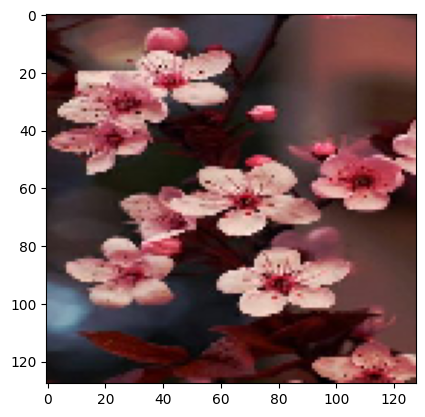

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/sakura0.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(128, 128))
img_arr   = img_to_array(test_img).reshape(1, 128, 128, 3)/255
class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])

plt.imshow(test_img)

     

1/1 [==============================] - 0s 62ms/step
Predicted class: sakura


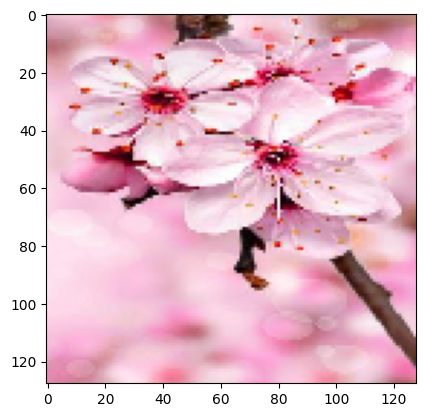

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/sakura1.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(128, 128))
img_arr   = img_to_array(test_img).reshape(1, 128, 128, 3)/255

class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)
     

1/1 [==============================] - 0s 35ms/step
Predicted class: rose


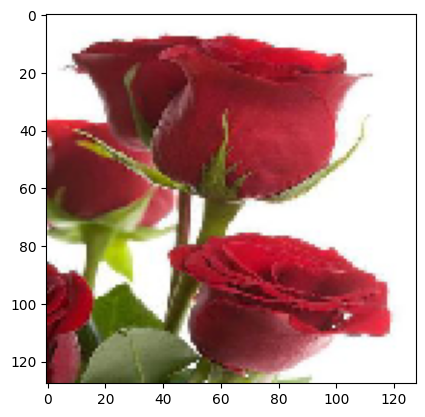

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/rose1.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(128, 128))
img_arr   = img_to_array(test_img).reshape(1, 128, 128, 3)/255

class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

1/1 [==============================] - 0s 35ms/step
Predicted class: rose


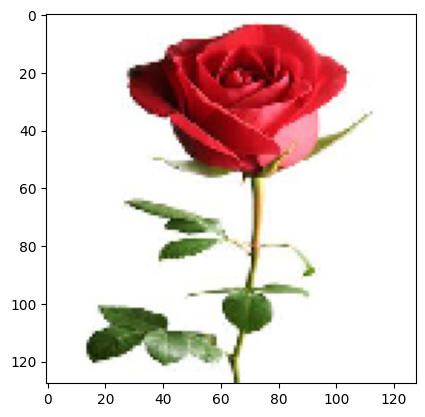

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/rose0.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(128, 128))
img_arr   = img_to_array(test_img).reshape(1, 128, 128, 3)/255

class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

1/1 [==============================] - 0s 56ms/step
Predicted class: daisy


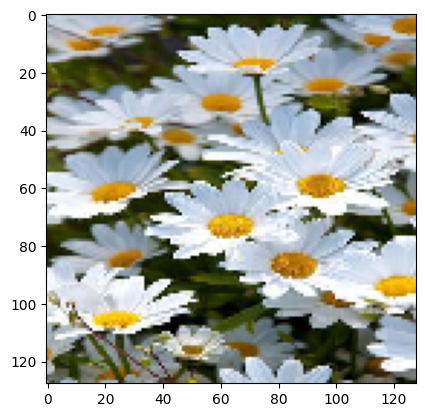

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/daisy1.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(128, 128))
img_arr   = img_to_array(test_img).reshape(1, 128, 128, 3)/255

class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

1/1 [==============================] - 0s 45ms/step
Predicted class: daisy


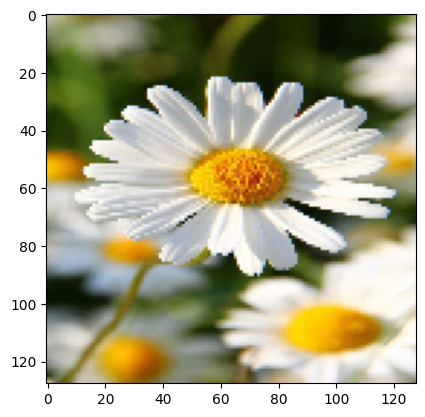

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/daisy0.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(128, 128))
img_arr   = img_to_array(test_img).reshape(1, 128, 128, 3)/255

class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

1/1 [==============================] - 0s 35ms/step
Predicted class: lotus


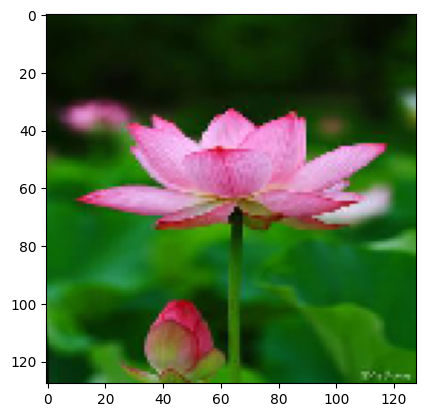

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/lotus0.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(128, 128))
img_arr   = img_to_array(test_img).reshape(1, 128, 128, 3)/255

class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)

1/1 [==============================] - 0s 35ms/step
Predicted class: lotus


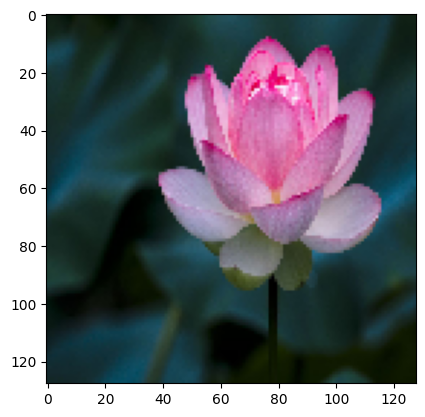

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/Flower/lotus.jpg'

test_img  = load_img(file_path, color_mode='rgb', target_size=(128, 128))
img_arr   = img_to_array(test_img).reshape(1, 128, 128, 3)/255

class_pred = np.argmax(model.predict(img_arr))
print("Predicted class:", class_names[class_pred])
plt.imshow(test_img)